In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import kagglehub
import os


In [2]:
path = kagglehub.dataset_download("shrutibhargava94/india-air-quality-data")

print("Dataset path:", path)
os.listdir(path)
file_path = os.path.join(path, "data.csv")

df = pd.read_csv(file_path, encoding="latin1")

df.head()


100%|██████████| 5.22M/5.22M [00:00<00:00, 114MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/shrutibhargava94/india-air-quality-data/versions/1


/tmp/ipython-input-3163570228.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
r = 102316130
ar = 0.05 * (np.mod(r,7))
br = 0.3 * (np.mod(r,5) + 1)

In [4]:
print(f'{ar.item()}, {br.item()}')

0.0, 0.3


In [5]:
x = df['no2'].dropna().values
x

array([17.4,  7. , 28.5, ..., 45. , 50. , 46. ])

In [6]:
z_df = x + ar * np.sin(br * x)
z_df

array([17.4,  7. , 28.5, ..., 45. , 50. , 46. ])

In [7]:
mu = np.mean(z_df)
sigma = np.std(z_df)
lambda_para = 1 / (2 * np.square(sigma))
const = 1 / (sigma * np.sqrt(2 * np.pi))

In [8]:
p_z = const * np.exp( -lambda_para * np.square(z_df - mu))
p_z

array([0.01944511, 0.01286069, 0.02133416, ..., 0.01259178, 0.00917306,
       0.01188802])

In [9]:
mu.item()

25.809622897811263

In [10]:
sigma.item()

18.503064345501237

In [11]:
lambda_para.item()

0.0014604365254890011

In [12]:
const.item()

0.02156087623931492

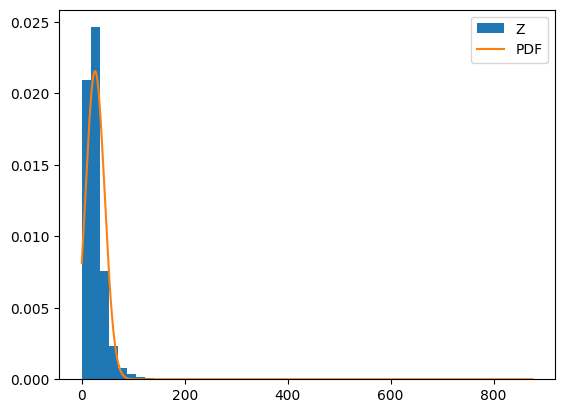

In [13]:
plt.hist(z_df, bins=50, density=True, label='Z')
x = np.linspace(z_df.min(), z_df.max(), 1000)
y = const * np.exp(-lambda_para * (x - mu)**2)
plt.plot(x, y, label='PDF')
plt.legend()
plt.show()